## CRISP-DM Phase 5. Evaluation

In [11]:
# Dependencies
import sys
sys.path.append('../src')
import utils
import data_processor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import warnings 
warnings.filterwarnings('ignore')

# Load processed data
data: pd.DataFrame = utils.load_preprocessed_data("../data/processed/financial_data_processed.pkl")

# Data preprocessing object
processor = data_processor.DataProcessor(data)
X, y = processor.create_feature_matrix_and_target_vector(target_column="Financial Distress")

# Test Data to be used by the best classifier
_, X_test , _, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Loading the best classifier (xgboost)
xgb_classifier = pkl.load(open("../artifacts/xgb.pkl", 'rb'))

In [8]:
# Evaluating the Model on test set
y_pred = xgb_classifier.predict(X_test)

acccuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")


print("*************** \n Gradient Boosting Results \n***************")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)

*************** 
 Gradient Boosting Results 
***************
Accuracy    :  0.8909853249475891
Recall      :  0.8909853249475891
Precision   :  0.8902839312844277


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       640
           1       0.85      0.82      0.83       314

    accuracy                           0.89       954
   macro avg       0.88      0.87      0.88       954
weighted avg       0.89      0.89      0.89       954



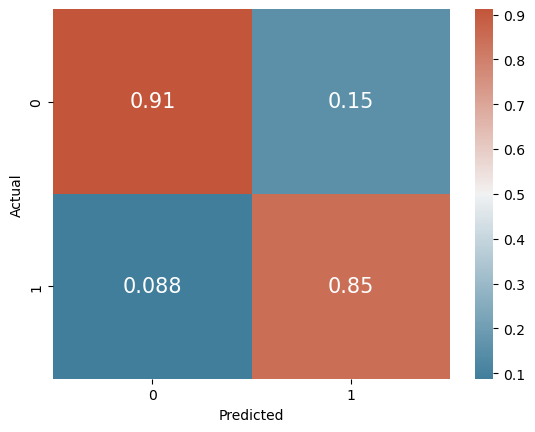

In [28]:
# confusion matrix 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})
plt.show()

f1=0.832 auc=0.906 ap=0.906


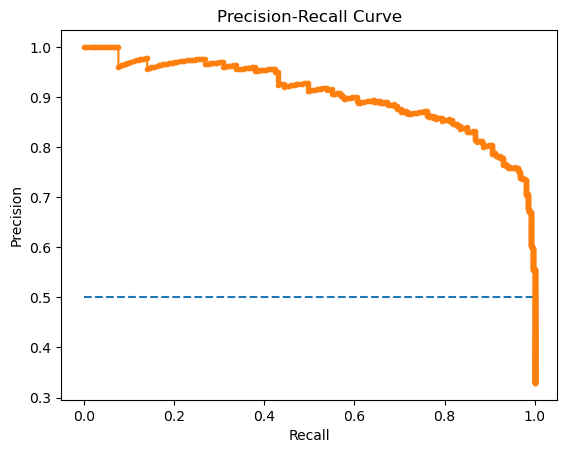

In [29]:
# Evaluate with precision-recall curve and ROC curve and f1-score
# predict probabilities
probs = xgb_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = xgb_classifier.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

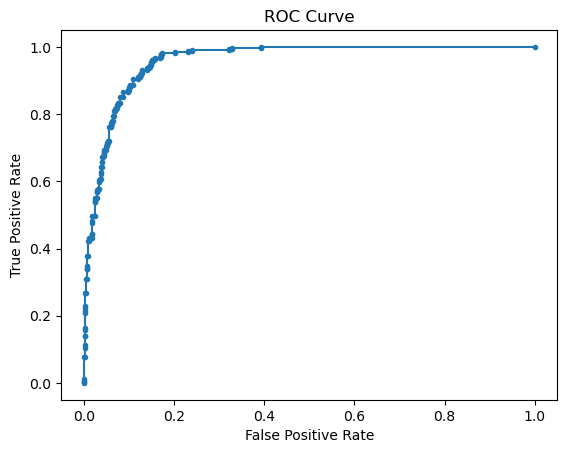

AUC: 0.959


In [30]:
# ROC curve
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# calculate AUC
auc = roc_auc_score(y_test, probs)
# plot the roc curve for the model
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, marker='.')
plt.show()
print('AUC: %.3f' % auc)

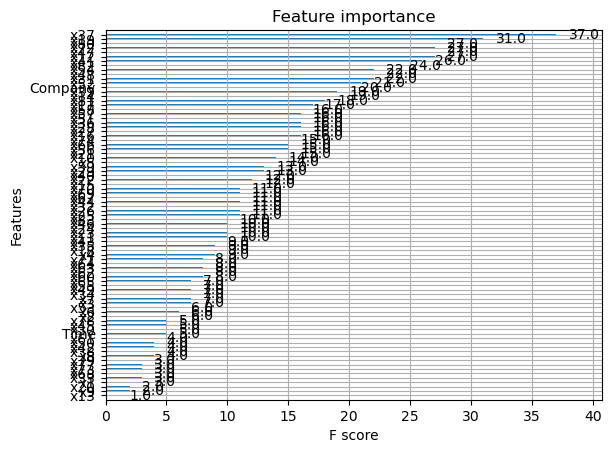

In [31]:
# plot feature importance
from xgboost import plot_importance
plot_importance(xgb_classifier)
plt.show()